In [2]:
import pandas as pd
import os
import seaborn as sns

In [28]:
files = ["EV_binary_equalIndifference_simulations_0.csv", 
         "EV_binary_equalIndifference_simulations_1.csv", 
         "EV_binary_equalIndifference_simulations_2.csv", 
         "EV_binary_equalIndifference_simulations_3.csv",
         "EV_ordinal_equalIndifference_simulations_0.csv",
         "EV_ordinal_equalIndifference_simulations_1.csv",
         "EV_ordinal_equalIndifference_simulations_2.csv",
         "EV_ordinal_equalIndifference_simulations_3.csv",]

In [29]:
x = []
for file in files:
    x.append(pd.read_csv(file))

df = pd.concat(x, ignore_index=True)

In [30]:
df

,param_names,estimates,real,indx,model,condition
0,c,0.893551,1.0,1927.0,EV_binary,equalIndifference
1,sigma,0.502093,0.5,1927.0,EV_binary,equalIndifference
2,delta,0.000000,0.0,1927.0,EV_binary,equalIndifference
3,loss,12.168951,NaN,1927.0,EV_binary,equalIndifference
4,c,1.651953,1.0,1959.0,EV_binary,equalIndifference
...,...,...,...,...,...,...
275,a_2,-6.138234,-6.0,1999.0,EV_ordinal,equalIndifference
276,c,1.440310,2.0,1999.0,EV_ordinal,equalIndifference
277,sigma,5.164961,4.5,1999.0,EV_ordinal,equalIndifference
278,delta,0.000000,0.0,1999.0,EV_ordinal,equalIndifference


In [35]:
# Pivot the estimates
est_df = df.query("model == 'EV_ordinal'").pivot(index='indx', columns='param_names', values='estimates')
est_df.columns = [f"{col}_estimates" for col in est_df.columns]

# Pivot the real values
real_df = df.query("model == 'EV_ordinal'").pivot(index='indx', columns='param_names', values='real')
real_df.columns = [f"{col}_real" for col in real_df.columns]

# Get the condition (assuming it's constant per indx)
cond_df = df.query("model == 'EV_ordinal'")[['indx', 'condition']].drop_duplicates().set_index('indx')

# Combine all into one wide dataframe
final_df2 = pd.concat([est_df, real_df, cond_df], axis=1).reset_index()

<Axes: xlabel='sigma_real', ylabel='sigma_estimates'>

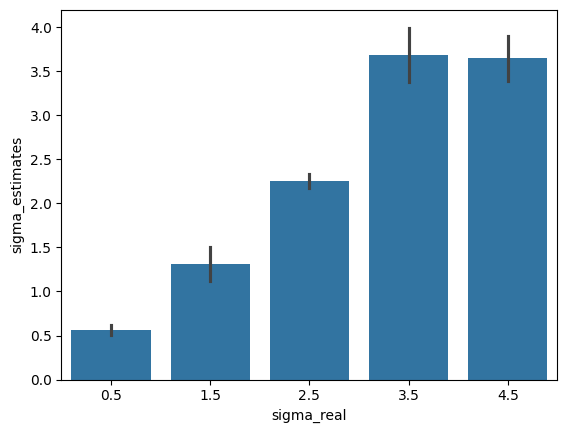

In [40]:
sns.barplot(final_df, x = "sigma_real", y = "sigma_estimates")

<Axes: xlabel='a_2_real', ylabel='a_2_estimates'>

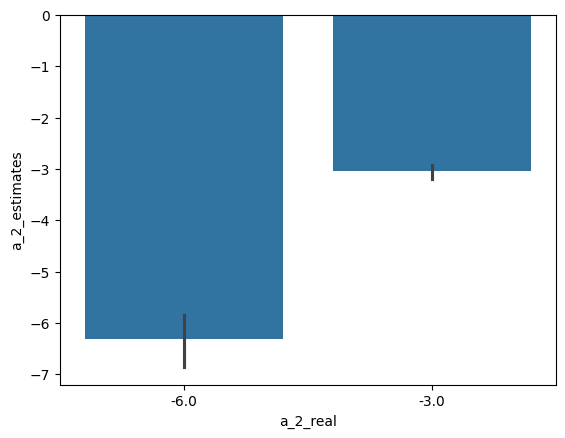

In [42]:
sns.barplot(final_df2, x = "a_2_real", y = "a_2_estimates")

<Axes: xlabel='real', ylabel='estimates'>

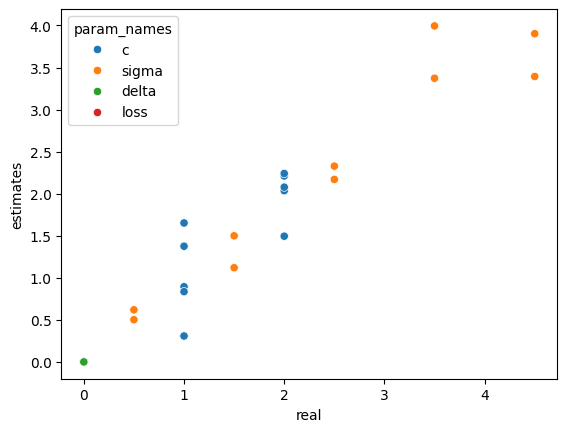

In [6]:
sns.scatterplot(data=df, x = "real", y = "estimates", hue = "param_names")